In [197]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [198]:
titanic = pd.read_csv('train.csv')

In [199]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [200]:
titanic.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Penasco y Castellana, Mrs. Victor de Satode (M...",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [201]:
titanic.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [202]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [203]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,16))
sns.set()

<Figure size 1152x1152 with 0 Axes>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1a5d9a20>,
      dtype=object)

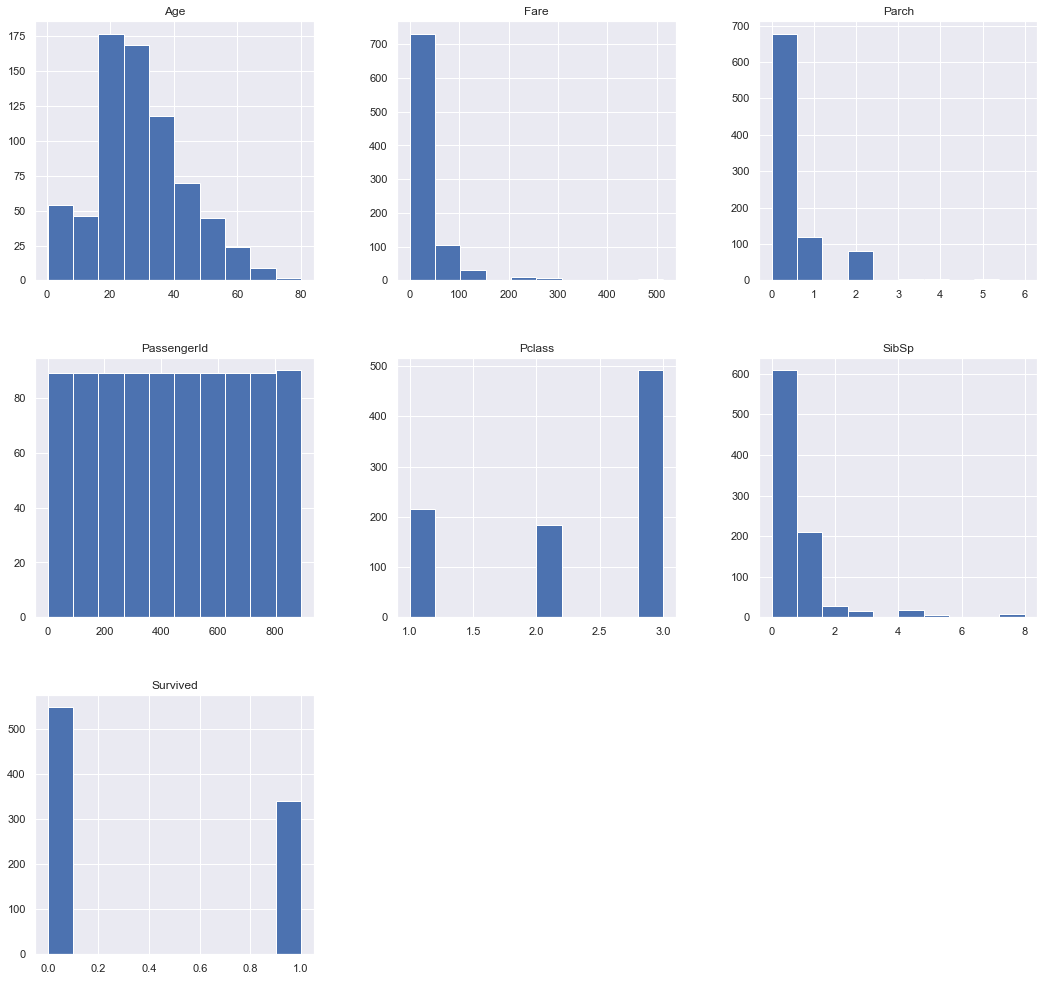

In [204]:
titanic.hist(figsize=(16,16))

In [205]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [206]:
len(titanic.PassengerId.unique())

891

#### Since all values of passenger id are unique, it is not useful for prediction.

In [207]:
titanic.drop('PassengerId', axis = 1, inplace = True)

In [208]:
titanic.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#### Analyzing ticket column

In [209]:
len(titanic.Ticket.unique())

681

In [210]:
ticket_counts_df = titanic.Ticket.value_counts().to_frame()
ticket_counts_df.head()

,Ticket
CA. 2343,7
1601,7
347082,7
3101295,6
347088,6


In [211]:
duplicate_tickets = ticket_counts_df[ticket_counts_df['Ticket'] > 1].index.to_list()

In [212]:
friends_family_df = titanic[titanic['Ticket'].isin(duplicate_tickets)].sort_values(by='Ticket')
friends_family_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
257,1,1,"Cherry, Miss. Gladys",female,30.0,0,0,110152,86.50,B77,S
759,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.50,B77,S
504,1,1,"Maioni, Miss. Roberta",female,16.0,0,0,110152,86.50,B79,S
262,0,1,"Taussig, Mr. Emil",male,52.0,1,1,110413,79.65,E67,S
558,1,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.0,1,1,110413,79.65,E67,S


#### Figure out whether people with the same ticket have the same tendency to survive.

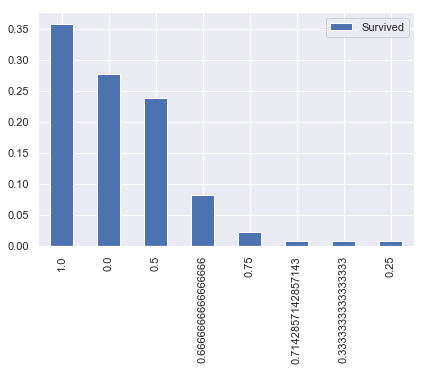

In [213]:
survival_same_ticket = (friends_family_df.groupby('Ticket')\
                        .Survived.sum()/friends_family_df.groupby('Ticket').Survived.count()).to_frame()
survival_same_ticket_dist = survival_same_ticket.Survived.value_counts().to_frame()
survival_same_ticket_dist['Survived'] = survival_same_ticket_dist['Survived']/survival_same_ticket_dist.Survived.sum()
survival_same_ticket_dist.plot(kind='bar')

#### In 35% of the duplicate ticket cases, all people in the same group survived. In 27% of the duplicate ticket cases, all people in the same group died. In the remaining 38% of the duplicate ticket cases, people in the same group had irregular survival rate.

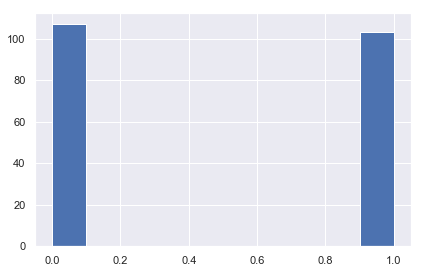

In [214]:
titanic[titanic.duplicated(subset='Ticket')].Survived.hist()

#### There is almost an even distribution between survived and non-survived people when they shared a ticket with somebody else on the ship. Hence, the ticket does not explain the survival rate. Dropping the column for now.

In [215]:
titanic.drop('Ticket', axis=1, inplace=True)

In [216]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


#### Analyzing Sex column

In [217]:
titanic.Sex.unique()

array(['male', 'female'], dtype=object)

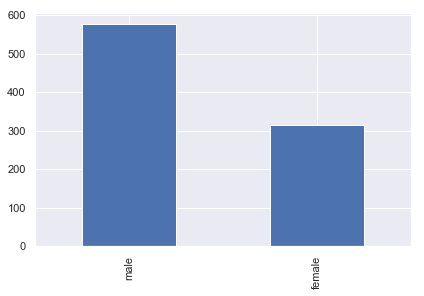

In [218]:
titanic.Sex.value_counts().plot(kind='bar')

In [219]:
titanic.groupby('Sex').Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [220]:
def grouped_survival_bar(grouped_by_field_name):
    titanic.groupby(grouped_by_field_name).apply(lambda x: round(((x['Survived'].sum()/x['Survived'].count())*100), 2)).plot(kind='bar')

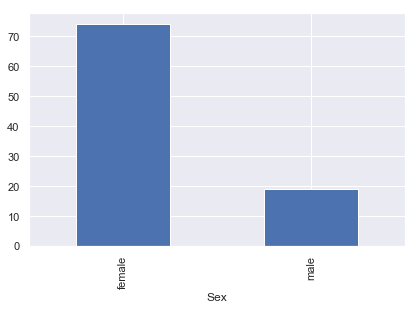

In [221]:
grouped_survival_bar('Sex')

#### >70% of the females survived compared to only about 20% of males although the number of males were much more in comparison to females. So, looks like Sex is an important factor for predicting Survival.

#### Using LabelEncoder to encode Sex since there are only 2 possible values.

In [222]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
titanic['Sex'] = le.fit_transform(titanic['Sex'])
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,NaN,S


#### Embarkation port analysis

In [223]:
titanic.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [224]:
titanic.Embarked.isnull().sum()

2

In [227]:
titanic[titanic.Embarked.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
61,1,1,"Icard, Miss. Amelie",0,38.0,0,0,80.0,B28,NaN
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",0,62.0,0,0,80.0,B28,NaN


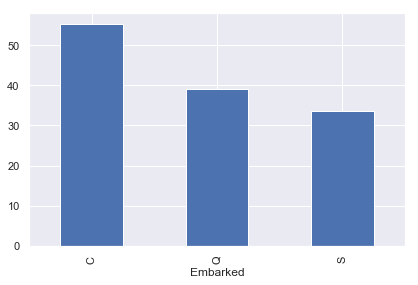

In [225]:
grouped_survival_bar('Embarked')

#### > 50% of people who embarked from port C survived compared to < 40% in case of Q and S. This also looks like a factor in predicting survival likelihood. A person embarking from port C has higher likelihood to survive. Since, the 2 cases in which the embarkation port is missing have survived, let us substitute the missing value with port C.

In [230]:
titanic.loc[titanic.Embarked.isnull(), 'Embarked'] = 'C'
titanic.Embarked.isnull().sum()

0

#### One hot encode the categorical embarkation port

In [252]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
encoded_port = ohe.fit_transform(titanic[['Embarked']]).toarray()
print(encoded_port)
print(ohe.get_feature_names())

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]
['x0_C' 'x0_Q' 'x0_S']


In [253]:
titanic.loc[:, 'Embarked_C'] = encoded_port[:, 0]
titanic.loc[:, 'Embarked_Q'] = encoded_port[:, 1]
titanic.loc[:, 'Embarked_S'] = encoded_port[:, 2]
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,NaN,S,0.0,0.0,1.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C85,C,1.0,0.0,0.0
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,NaN,S,0.0,0.0,1.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,C123,S,0.0,0.0,1.0
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,NaN,S,0.0,0.0,1.0


In [254]:
titanic.drop('Embarked', axis=1, inplace=True)
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,NaN,0.0,0.0,1.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C85,1.0,0.0,0.0
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,NaN,0.0,0.0,1.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,C123,0.0,0.0,1.0
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,NaN,0.0,0.0,1.0


In [255]:
titanic.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Cabin', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

#### Passenger class analysis

In [256]:
titanic.Pclass.isnull().sum()

0

In [257]:
titanic.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

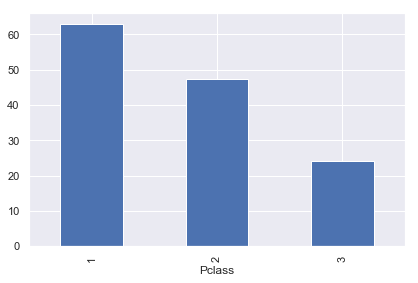

In [258]:
grouped_survival_bar('Pclass')

#### Looks like a clear trend that survival rate decreases as the passenger class becomes worse. Higher number of passenger class reflects a lower socio economic status. Thus, we will keep the PClass as is to consider for a feature.

In [259]:
titanic.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Cabin', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

#### Cabin analysis

In [267]:
titanic.Cabin.isnull().sum()/titanic.shape[0]

0.7710437710437711

In [268]:
titanic.Cabin.value_counts()

C23 C25 C27    4
B96 B98        4
G6             4
D              3
F2             3
              ..
B82 B84        1
A34            1
C85            1
A7             1
C70            1
Name: Cabin, Length: 147, dtype: int64

In [269]:
titanic.Cabin.nunique()

147

In [270]:
titanic.Cabin.count()

204

In [273]:
titanic[titanic.Cabin == 'C23 C25 C27']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
27,0,1,"Fortune, Mr. Charles Alexander",1,19.0,3,2,263.0,C23 C25 C27,0.0,0.0,1.0
88,1,1,"Fortune, Miss. Mabel Helen",0,23.0,3,2,263.0,C23 C25 C27,0.0,0.0,1.0
341,1,1,"Fortune, Miss. Alice Elizabeth",0,24.0,3,2,263.0,C23 C25 C27,0.0,0.0,1.0
438,0,1,"Fortune, Mr. Mark",1,64.0,1,4,263.0,C23 C25 C27,0.0,0.0,1.0


In [274]:
titanic[titanic.Cabin == 'B82 B84']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
789,0,1,"Guggenheim, Mr. Benjamin",1,46.0,0,0,79.2,B82 B84,1.0,0.0,0.0


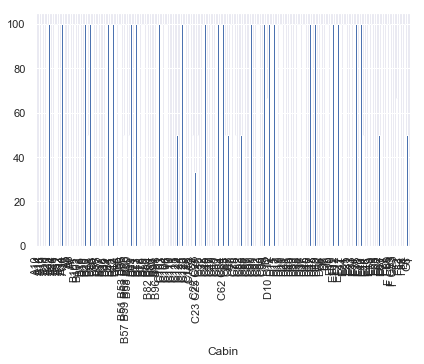

In [275]:
grouped_survival_bar('Cabin')

In [299]:
titanic.loc[:, 'Cabin_Category'] = titanic.Cabin.str.extract(r'(?P<letter>[A-Z]).').letter
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Cabin_Category
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,NaN,0.0,0.0,1.0,NaN
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C85,1.0,0.0,0.0,C
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,NaN,0.0,0.0,1.0,NaN
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,C123,0.0,0.0,1.0,C
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,NaN,0.0,0.0,1.0,NaN


In [300]:
titanic[titanic.Cabin == 'C23 C25 C27']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Cabin_Category
27,0,1,"Fortune, Mr. Charles Alexander",1,19.0,3,2,263.0,C23 C25 C27,0.0,0.0,1.0,C
88,1,1,"Fortune, Miss. Mabel Helen",0,23.0,3,2,263.0,C23 C25 C27,0.0,0.0,1.0,C
341,1,1,"Fortune, Miss. Alice Elizabeth",0,24.0,3,2,263.0,C23 C25 C27,0.0,0.0,1.0,C
438,0,1,"Fortune, Mr. Mark",1,64.0,1,4,263.0,C23 C25 C27,0.0,0.0,1.0,C


#### Assign special cabin category for missing values

In [303]:
titanic.loc[titanic.Cabin.isnull(), 'Cabin_Category'] = 'Z'

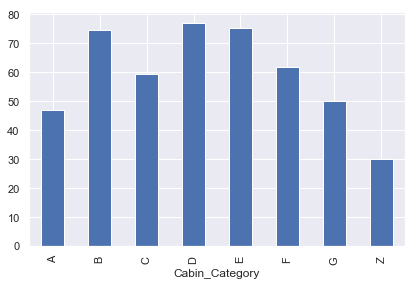

In [304]:
grouped_survival_bar('Cabin_Category')

#### Looks like Cabin Category also has variation in the percentage survival rate. Let's consider this as one of the features and get rid of the raw cabin column.

In [305]:
titanic.drop('Cabin', axis=1, inplace=True)

In [306]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Cabin_Category
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,0.0,0.0,1.0,Z
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,1.0,0.0,0.0,C
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,0.0,0.0,1.0,Z
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,0.0,0.0,1.0,C
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,0.0,0.0,1.0,Z


In [309]:
titanic.loc[titanic['Cabin_Category'].isnull(), 'Cabin_Category'] = 'Z'

#### One hot encode the cabin category

In [310]:

ohe_cc = OneHotEncoder()
encoded_cc = ohe_cc.fit_transform(titanic[['Cabin_Category']]).toarray()
print(encoded_cc)
print(ohe_cc.get_feature_names())

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
['x0_A' 'x0_B' 'x0_C' 'x0_D' 'x0_E' 'x0_F' 'x0_G' 'x0_Z']


In [313]:
encoded_df = pd.DataFrame(data=encoded_cc, columns = ['Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_Missing'])
encoded_df.head()

,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_Missing
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [318]:
titanic = titanic.join(encoded_df)

In [319]:
titanic.drop('Cabin_Category', axis=1, inplace=True)
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_Missing
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [321]:
titanic.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Cabin_A', 'Cabin_B',
       'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_Missing'],
      dtype='object')

#### Fare analysis

In [322]:
titanic.Fare.isnull().sum()

0

#### Since Passenger class was reflective of the socio economic status, a higher passenger class (in rank) should indicate a higher fare. Analysing their relationship below.

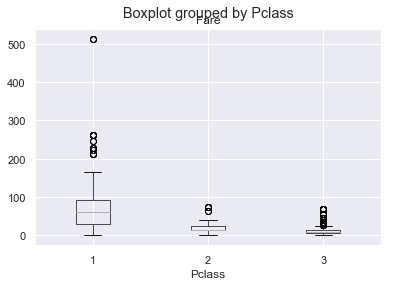

In [330]:
titanic.boxplot(column='Fare', by='Pclass')

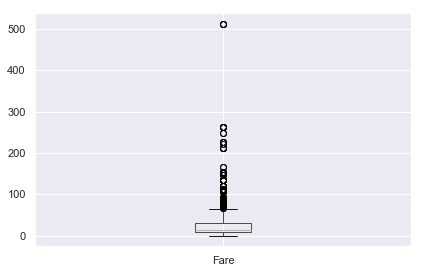

In [339]:
titanic.boxplot(column='Fare')

In [333]:
titanic[['Fare', 'Pclass']].corr()

,Fare,Pclass
Fare,1.0000,-0.5495
Pclass,-0.5495,1.0000


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


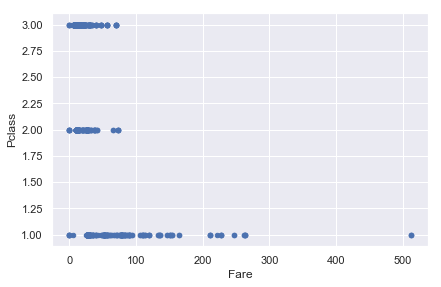

In [338]:
titanic.plot.scatter('Fare', 'Pclass')

#### Based on the above, it looks like higher fares are only present for the higher Passenger Class. But the majority of the fares lie in the lower range (probably < 100 ) and there is an almost equal distribution of Passenger class for that fare category. We will try and confirm these assumptions below.

In [341]:
titanic[titanic['Fare'] < 100].shape

(838, 19)

In [342]:
lower_fare = titanic[titanic['Fare'] < 100]

In [343]:
lower_fare.Pclass.value_counts()

3    491
2    184
1    163
Name: Pclass, dtype: int64

In [344]:
titanic.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

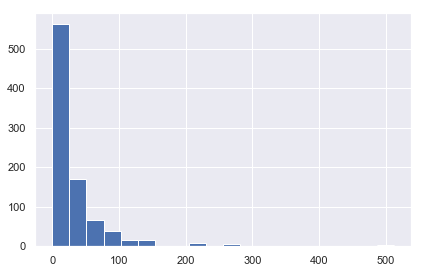

In [345]:
titanic.Fare.hist(bins=20)

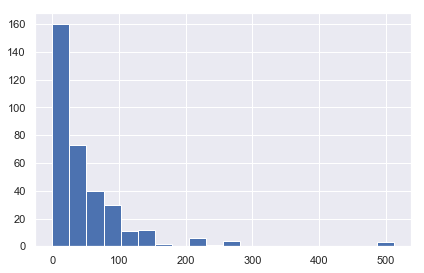

In [346]:
titanic[titanic['Survived'] == 1].Fare.hist(bins=20)

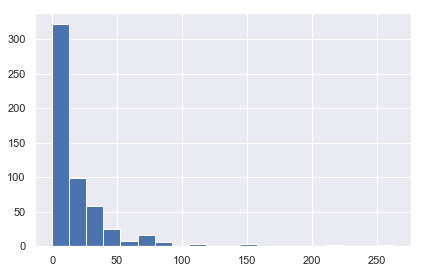

In [347]:
titanic[titanic['Survived'] == 0].Fare.hist(bins=20)

<BarContainer object of 10 artists>

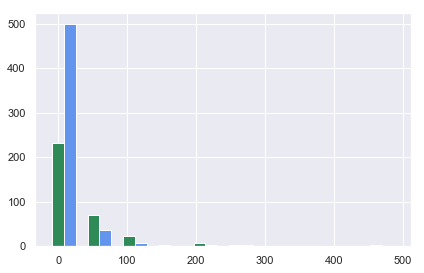

In [349]:
fig, ax = plt.subplots()

a_heights, a_bins = np.histogram(titanic[titanic['Survived'] == 1].Fare)
b_heights, b_bins = np.histogram(titanic[titanic['Survived'] == 0].Fare, bins=a_bins)

width = (a_bins[1] - a_bins[0])/3

ax.bar(a_bins[:-1], a_heights, width=width, facecolor='seagreen')
ax.bar(b_bins[:-1]+width, b_heights, width=width, facecolor='cornflowerblue')

#### Based on the above looks like, the survival rate increases as the fare increases, further indicating that people who paid more were most likely to survive. Thus, the rich were preferred. Fare would thus be a promising feature to keep.

####  Checking whether the outlier also agrees with the above hypothesis.

In [351]:
titanic[titanic['Fare'] > 500]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_Missing
258,1,1,"Ward, Miss. Anna",0,35.0,0,0,512.3292,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
679,1,1,"Cardeza, Mr. Thomas Drake Martinez",1,36.0,0,1,512.3292,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
737,1,1,"Lesurer, Mr. Gustave J",1,35.0,0,0,512.3292,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [355]:
titanic[titanic['Fare'] > 200].shape

(20, 19)

In [356]:
titanic[titanic['Fare'] > 200].Survived.value_counts()

1    14
0     6
Name: Survived, dtype: int64

In [367]:
titanic[(titanic['Fare'] > 200) & (titanic['Survived'] == 0)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_Missing
27,0,1,"Fortune, Mr. Charles Alexander",1,19.0,3,2,263.0000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
118,0,1,"Baxter, Mr. Quigg Edmond",1,24.0,0,1,247.5208,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
377,0,1,"Widener, Mr. Harry Elkins",1,27.0,0,2,211.5000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
438,0,1,"Fortune, Mr. Mark",1,64.0,1,4,263.0000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
527,0,1,"Farthing, Mr. John",1,NaN,0,0,221.7792,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
557,0,1,"Robbins, Mr. Victor",1,NaN,0,0,227.5250,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [369]:
titanic.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Cabin_A', 'Cabin_B',
       'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_Missing'],
      dtype='object')

#### Analysing Siblings and Spouses (SibSp)

In [370]:
titanic['SibSp'].isnull().sum()

0

In [371]:
titanic['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

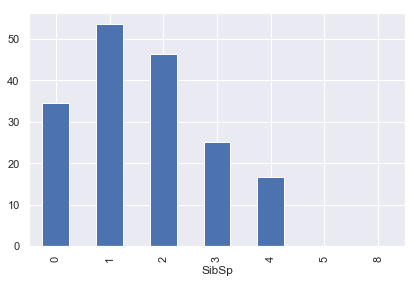

In [372]:
grouped_survival_bar('SibSp')

#### Based on the above, since there are different survival rates for different number of SibSp, it looks like it does play a role in determining the survival. The survival is higher for people with 1 or 2 siblings/spouses and decreases otherwise.

#### Analyzing parents and children (Parch)

In [374]:
titanic['Parch'].isnull().sum()

0

In [375]:
titanic['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

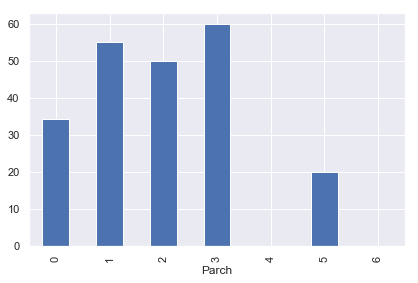

In [377]:
grouped_survival_bar('Parch')

In [ ]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

In [ ]:
feature_columns = ['Fare', 'Pclass', 'Age']

In [ ]:
X = titanic[feature_columns]

In [ ]:
X.isnull().sum()

In [ ]:
X_transformed = imp_mean.fit_transform(X)
X = pd.DataFrame(data=X_transformed, columns = feature_columns)
X.head()

In [ ]:
X.isnull().sum()

In [ ]:
y = titanic['Survived']

In [ ]:
plt.scatter(X['Fare'], X['Age'], c=y)

In [ ]:
plt.scatter(X['Fare'], X['Pclass'], c=y)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)
X_scaled

In [ ]:
X = pd.DataFrame(data=X_scaled, columns=['Fare', 'Pclass', 'Age'])

In [ ]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y)

In [ ]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 2], c=y, alpha=0.2)

In [ ]:
plt.scatter(X_scaled[:, 0], y)

In [ ]:
plt.scatter(X_scaled[:, 2], y)

In [ ]:
categorical = titanic[['Embarked']]
categorical

In [ ]:
titanic[titanic.isnull().any(axis=1)]

In [ ]:
titanic[titanic.Embarked.isnull()]

In [ ]:
categorical.fillna('N', inplace=True)
categorical.isnull().sum()

In [ ]:
categorical.Embarked.value_counts()

In [ ]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')
categorical_encoded = enc.fit_transform(categorical).toarray()

In [ ]:
categorical_encoded

In [ ]:
enc.get_feature_names()

In [ ]:
encoded_feature_names = ['embarked_C', 'embarked_N', 'embarked_Q', 'embarked_S']

In [ ]:
categorical_df = pd.DataFrame(data=categorical_encoded, columns = encoded_feature_names)

In [ ]:
categorical_df.head()

In [ ]:
X = X.join(categorical_df)

In [ ]:
X

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, X, y, cv=20)
print(scores)
print(scores.mean())

In [ ]:
base_accuracy = 105/(105+74)
print(base_accuracy)

In [ ]:
lr.fit(X, y)

In [ ]:
from sklearn.svm import SVC
svm = SVC(C=100)
scores = cross_val_score(svm, X, y, cv=20)
print(scores)
print(scores.mean())

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
scores = cross_val_score(rfc, X, y, cv=20)
print(scores)
print(scores.mean())

In [ ]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.20, random_state=42)
print(train_X.shape, test_X.shape, train_y.shape, test_y.shape)

In [ ]:
lr.fit(train_X, train_y)

In [ ]:
lr.score(test_X, test_y)

In [ ]:
lr.score(train_X, train_y)

In [ ]:
svm.fit(train_X, train_y)

In [ ]:
svm.score(train_X, train_y)

In [ ]:
svm.score(test_X, test_y)

In [ ]:
rfc.fit(train_X, train_y)

In [ ]:
rfc.score(train_X, train_y)

In [ ]:
rfc.score(test_X, test_y)

In [ ]:
rfc2 = RandomForestClassifier(n_estimators=200)
rfc2.fit(train_X, train_y)
print(rfc2.score(train_X, train_y))
print(rfc2.score(test_X, test_y))

In [ ]:
titanic_test = pd.read_csv('/kaggle/input/titanic/test.csv')

In [ ]:
titanic_test.head()

In [ ]:
titanic_test[titanic_test.Fare.isnull()]

In [ ]:
#titanic_test.loc[titanic_test.Fare.isnull(), 'Fare'] = 0

In [ ]:
test_embarked = enc.transform(titanic_test[['Embarked']]).toarray()

In [ ]:
test_embarked = pd.DataFrame(data = test_embarked, columns = encoded_feature_names)

In [ ]:
X_eval = titanic_test[feature_columns]
X_eval.head()

In [ ]:
X_eval.isnull().sum()

In [ ]:
X_eval_transformed = imp_mean.transform(X_eval)

In [ ]:
X_eval = pd.DataFrame(data=X_eval_transformed, columns = feature_columns)
X_eval.head()

In [ ]:
X_eval.isnull().sum()

In [ ]:
X_eval = min_max_scaler.transform(X_eval)

In [ ]:
X_eval = pd.DataFrame(data = X_eval, columns = feature_columns)

In [ ]:
X_eval.isnull().sum()

In [ ]:
test_preds = svm.predict(X_eval.join(test_embarked))

In [ ]:
y.value_counts()

In [ ]:
test_preds.size

In [ ]:
titanic_test.shape

In [ ]:
titanic_test.columns

In [ ]:
titanic_test['Survived'] = test_preds

In [ ]:
titanic_test.head()

In [ ]:
output = titanic_test[['PassengerId', 'Survived']]

In [ ]:
output.head()

In [ ]:
output.to_csv('submission.csv', index = False)

In [ ]:
output

In [ ]:
output.Survived.value_counts()